<a href="https://colab.research.google.com/github/torrhen/pytorch/blob/main/03_pytorch_computer_vision_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [99]:
# Check for GPU
!nvidia-smi

Wed Dec  7 20:54:12 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P0    28W /  70W |   6600MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [100]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'

1.13.0+cu116


## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [101]:
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor

# download MNIST training and test data
train_data = MNIST(root='data', train=True, download=True, transform=ToTensor(), target_transform=None)
test_data = MNIST(root='data', train=False, download=True, transform=ToTensor(), target_transform=None)

## 6. Visualize at least 5 different samples of the MNIST training dataset.

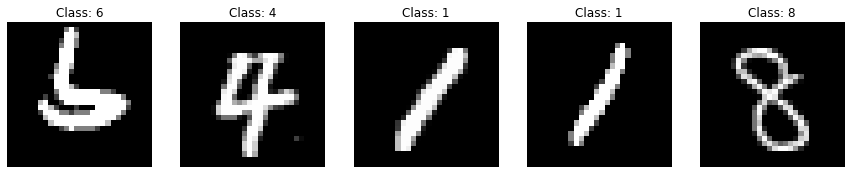

In [102]:
import random
import matplotlib.pyplot as plt

torch.manual_seed(42)
N_SAMPLES = 5
# select 5 random indexes from the training data
random_idx = random.sample(range(len(train_data)), k=N_SAMPLES)

fig = plt.figure(figsize=(15, 3))
# plot the image and label from the training data at each random index from the list above
for i, rand_idx in enumerate(random_idx):
  image, label = train_data[rand_idx][0].squeeze(dim=0), train_data[rand_idx][1]
  fig.add_subplot(1, 5, i+1)
  plt.imshow(image, cmap='gray')
  plt.title(f"Class: {label}")
  plt.axis(False)



## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [103]:
from torch.utils.data import DataLoader

torch.manual_seed(42)
# load training and test data into data loaders, shuffle and divide into batches
BATCH_SIZE = 32
train_loader = DataLoader(dataset=train_data, shuffle=True, batch_size=BATCH_SIZE)
test_loader = DataLoader(dataset=test_data, shuffle=False, batch_size=BATCH_SIZE)

print(f"{len(train_loader)} batches for a total of {len(train_data)} samples in the training data.")
print(f"{len(test_loader)} batches for a total of {len(test_data)} samples in the test data.")

1875 batches for a total of 60000 samples in the training data.
313 batches for a total of 10000 samples in the test data.


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [104]:
from torch import nn

class TinyVGG(nn.Module):
  def __init__(self):
    super().__init__()
    self.block1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=10, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.block2 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=10*7*7, out_features=10)
    )

  def forward(self, x):
    return self.fc(self.block2(self.block1(x)))

In [105]:
model2 = TinyVGG().to(device)

In [106]:
!pip install torchinfo

from torchinfo import summary

summary(model2, (1, 1, 28, 28))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 10]                   --
├─Sequential: 1-1                        [1, 10, 14, 14]           --
│    └─Conv2d: 2-1                       [1, 10, 28, 28]           100
│    └─ReLU: 2-2                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-3                       [1, 10, 28, 28]           910
│    └─ReLU: 2-4                         [1, 10, 28, 28]           --
│    └─MaxPool2d: 2-5                    [1, 10, 14, 14]           --
├─Sequential: 1-2                        [1, 10, 7, 7]             --
│    └─Conv2d: 2-6                       [1, 10, 14, 14]           910
│    └─ReLU: 2-7                         [1, 10, 14, 14]           --
│    └─Conv2d: 2-8                       [1, 10, 14, 14]           910
│    └─ReLU: 2-9                         [1, 10, 14, 14]           --
│    └─MaxPool2d: 2-10                   [1, 10, 7, 7]             --
├─Sequentia

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [107]:
# set up loss function
loss_fn = nn.CrossEntropyLoss()

# set up accuracy metric
!pip install torchmetrics
from torchmetrics import Accuracy
accuracy_fn = Accuracy(task='multiclass', num_classes=10).to(device)

# set up optimizer
optimizer = torch.optim.Adam(params=model2.parameters(), lr=0.0001)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [108]:
def train_step(model: nn.Module, dataloader: DataLoader, loss_func: nn.Module, optimizer: torch.optim.Optimizer, device: torch.device = device):

  train_loss = 0.0
  train_acc = 0.0

  model.train()

  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)

    # forward pass
    logits = model(X)

    # calculate loss
    loss = loss_func(logits, y)
    train_loss += loss

    # calculate accuracy
    labels = torch.argmax(torch.softmax(logits, dim=1), dim=1)
    acc = accuracy_fn(labels, y)
    train_acc += acc

    # zero grad
    optimizer.zero_grad()

    # back propagation
    loss.backward()

    # gradient descent
    optimizer.step()

  train_loss /= len(dataloader)
  train_acc /= len(dataloader)

  return train_loss, train_acc
    

In [109]:
def test_step(model: nn.Module, dataloader: DataLoader, loss_func: torch.nn, device: torch.device = device):
  test_loss = 0.0
  test_acc = 0.0

  model.eval()
  with torch.inference_mode():
    for batch, (X, y) in enumerate(dataloader):
      X, y = X.to(device), y.to(device)

      # prediction
      logits = model(X)

      # calculate and store loss
      loss = loss_func(logits, y)
      test_loss += loss

      # calculate and store accuracy
      labels = torch.argmax(torch.softmax(logits, dim=1), dim=1)
      acc = accuracy_fn(labels, y)
      test_acc += acc

    test_loss /= len(dataloader)
    test_acc /= len(dataloader)

  return test_loss, test_acc

In [110]:
N_EPOCHS = 5

def train(model: nn.Module, train_loader: DataLoader, test_loader: DataLoader, loss_func: nn.Module, optimizer: torch.optim.Optimizer, device: torch.device = device):
  results = {
      'train_loss':[],
      'train_acc':[],
      'test_loss':[],
      'test_acc':[]
  }

  for epoch in range(N_EPOCHS):
    train_loss, train_acc = train_step(model, train_loader, loss_func, optimizer, device)
    test_loss, test_acc = test_step(model, test_loader, loss_func, device)

    results['train_loss'].append(train_loss)
    results['train_acc'].append(train_acc)
    results['test_loss'].append(test_loss)
    results['test_acc'].append(test_acc)

    print(f"Epoch: {epoch+1} | Train Loss: {train_loss:.5f} | Train Acc: {train_acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")


In [111]:
model2_results = train(model2, train_loader, test_loader, loss_fn, optimizer, device)

Epoch: 1 | Train Loss: 0.66814 | Train Acc: 0.78% | Test Loss: 0.28650 | Test Acc: 0.92%
Epoch: 2 | Train Loss: 0.23996 | Train Acc: 0.93% | Test Loss: 0.17749 | Test Acc: 0.95%
Epoch: 3 | Train Loss: 0.16963 | Train Acc: 0.95% | Test Loss: 0.13000 | Test Acc: 0.96%
Epoch: 4 | Train Loss: 0.13320 | Train Acc: 0.96% | Test Loss: 0.10519 | Test Acc: 0.97%
Epoch: 5 | Train Loss: 0.11319 | Train Acc: 0.97% | Test Loss: 0.10392 | Test Acc: 0.97%


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [ ]:
def make_predictions(model: nn.Module, data: list, device: torch.device = device):
  # store the probabilities of labels for each sample in the list
  probabilities = []

  model.eval()
  with torch.inference_mode():
    for sample in data:
      # add a single batch dimension to the data and allocate the chosen device
      sample = torch.unsqueeze(sample, dim=0).to(device)
      # pred logits
      preds = model(sample)
      # calculate probability distribution over classes
      probs = torch.softmax(preds.squeeze(), dim=0)
      # store the distribution
      probabilities.append(probs.cpu)

  return torch.stack(probabilities) # stack all distributions into single tensor


In [ ]:
test_samples = []
test_labels = []
# select 5 random image-labels pairs from the test data
for sample, label in random.sample(list(test_data), k=N_SAMPLES):
  test_samples.append(sample)
  test_labels.append(label)

In [ ]:
# calculate probabilites for all 5 random samples
pred_probabilities = make_predictions(model2, test_samples, device)
print(pred_probabilities)

In [ ]:
# create a list of indexes with the highest probability from each distribution
pred_classes = pred_probabilities.argmax(dim=1)

In [117]:
import random
import matplotlib.pyplot as plt

torch.manual_seed(42)
N_SAMPLES = 5
# select 5 random indexes from the training data
random_idx = random.sample(range(len(test_data)), k=N_SAMPLES)

fig = plt.figure(figsize=(15, 3))
# plot the image and label from the training data at each random index from the list above
for i, rand_idx in enumerate(random_idx):
  image, label = test_data[rand_idx][0], test_data[rand_idx][1]

  image = image.to(device)
  
  model2.eval()
  with torch.inference_mode():
    pred_logit = model2(image)
    pred_label = test_data.classes[torch.argmax(torch.softmax(pred_logit, dim=1), dim=1)]

    if test_data.classes[label] == pred_label:
      colour = 'g'
    else:
      colour = 'r'

    fig.add_subplot(1, 5, i+1)
    plt.imshow(image.squeeze(dim=0), cmap='gray')
    plt.title(f"Predicted Class: {pred_label}", c=colour)
    plt.axis(False)

RuntimeError: ignored

<Figure size 1080x216 with 0 Axes>

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [113]:
import torch

X = torch.randn(1, 3, 64, 64)
print(f"Original shape: {X.shape}")

# convolution layers using increasing sized kernels
conv_kernel_3 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
conv_kernel_5 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=5, stride=1, padding=1)
conv_kernel_7 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=7, stride=1, padding=1)

print(f"3x3 kernel output shape: {conv_kernel_3(X).shape}")
print(f"5x5 kernel output shape: {conv_kernel_5(X).shape}")
print(f"7x7 kernel output shape: {conv_kernel_7(X).shape}")

Original shape: torch.Size([1, 3, 64, 64])
3x3 kernel output shape: torch.Size([1, 3, 64, 64])
5x5 kernel output shape: torch.Size([1, 3, 62, 62])
7x7 kernel output shape: torch.Size([1, 3, 60, 60])


As the kernel size increases, the output of the convolution becomes smaller. As the kernel size decreasess

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?